In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import svd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('data/telco_churn_data.csv')

In [26]:
newdf = df.drop(columns={'Customer ID','Offer','Internet Type','Churn Category','Customer Satisfaction','Churn Reason'})

In [28]:
toEncode = ['Multiple Lines','Internet Service','Gender','Married','Dependents']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(newdf[toEncode])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(toEncode))
one_hot_df

,Multiple Lines_No,Multiple Lines_Yes,Internet Service_No,Internet Service_Yes,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7039,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
7040,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
7041,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [30]:
object_cols = newdf.select_dtypes('object').columns.tolist()
object_cols

['Referred a Friend',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Gender',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'City']

In [32]:
df_encoded = pd.concat([newdf, one_hot_df], axis=1)

# Drop the original categorical columns to make the df only numerical
df_cleaned = df_encoded.drop(object_cols, axis=1)

In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Zip Code                           7043 non-null   int64

In [36]:
X = df_cleaned[['Tenure in Months','Avg Monthly Long Distance Charges','Monthly Charge','Total Extra Data Charges','Total Long Distance Charges']]
X.head()

,Tenure in Months,Avg Monthly Long Distance Charges,Monthly Charge,Total Extra Data Charges,Total Long Distance Charges
0,1,0.00,41.236,0.0,0.00
1,8,48.85,83.876,120.0,390.80
2,18,11.33,99.268,0.0,203.94
3,25,19.76,102.440,327.0,494.00
4,37,6.33,79.560,430.0,234.21


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
inertia_values = []
num_clusters_range = range(1, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

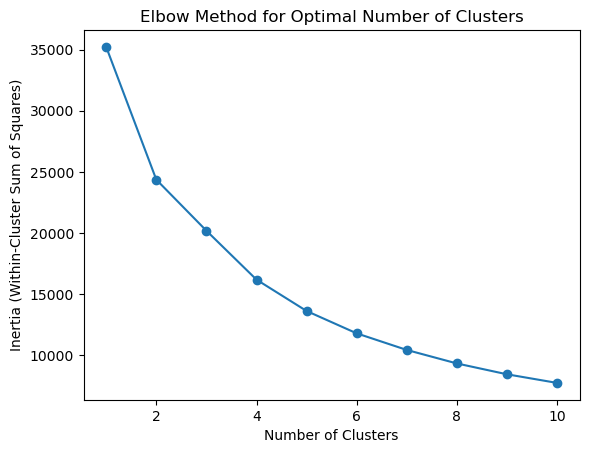

Enter the optimal number of clusters:  4


In [42]:
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

optimal_num_clusters = int(input("Enter the optimal number of clusters: "))

In [50]:
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
cluster_labels

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 3, 1, 2], dtype=int32)

In [52]:
df_cleaned['clusters'] = cluster_labels

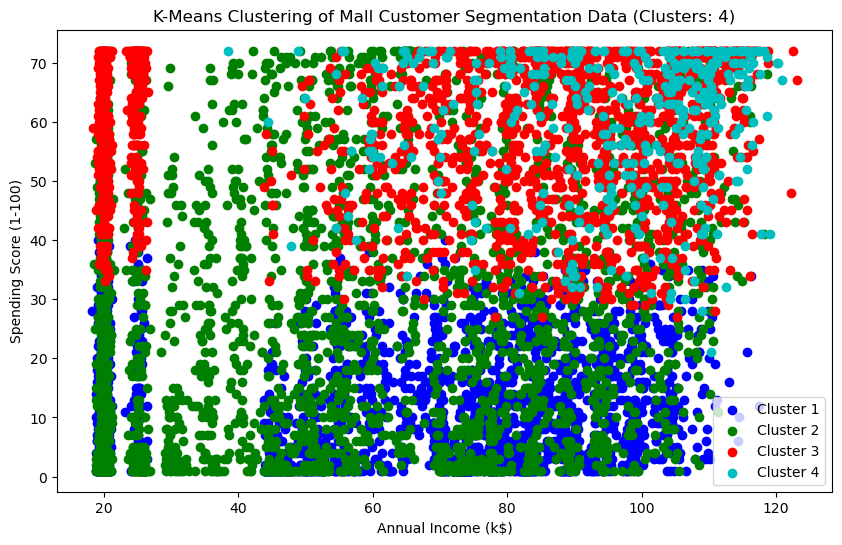

In [58]:
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(optimal_num_clusters):
    cluster_data = df_cleaned[df_cleaned['clusters'] == i]
    plt.scatter(cluster_data['Monthly Charge'], cluster_data['Tenure in Months'],
                color=colors[i], label=f'Cluster {i + 1}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering of Mall Customer Segmentation Data (Clusters: {optimal_num_clusters})')
plt.legend()
plt.show()